# Figure 4

This figure contains the heatmap of the theta and TVD values, as well as the scatter plot of the same values

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
#Folders
projpath = os.path.realpath("../..")
pathfig  = os.path.join(projpath, "Results", "Figures")
pathres  = os.path.join(projpath, "Results")

In [4]:
os.chdir(pathres)
dists  = np.array(pd.read_csv("distance_matrices.csv", header=None))
dists2 = np.array(pd.read_csv("distance_matrices2.csv", header=None))
scaled_dists  = dists
scaled_dists2 = dists2
low_indices  = np.tril_indices(10, k = -1)
tvds    = dists[low_indices]
madist  = dists2[low_indices]
dt    = dists.transpose()
theta = dt[low_indices]

#Scaling values and pasting them
def scale_array(nparray):
    scaled = (nparray - nparray.min() ) / np.ptp(nparray)
    return(scaled)

scaled_tvds   = scale_array(tvds)
scaled_theta  = scale_array(theta)
scaled_madist = scale_array(madist)
scaled_dists.transpose()[low_indices] = scaled_theta
scaled_dists[low_indices] = scaled_tvds
scaled_dists2.transpose()[low_indices] = scaled_theta
scaled_dists2[low_indices] = scaled_madist

Plot figure

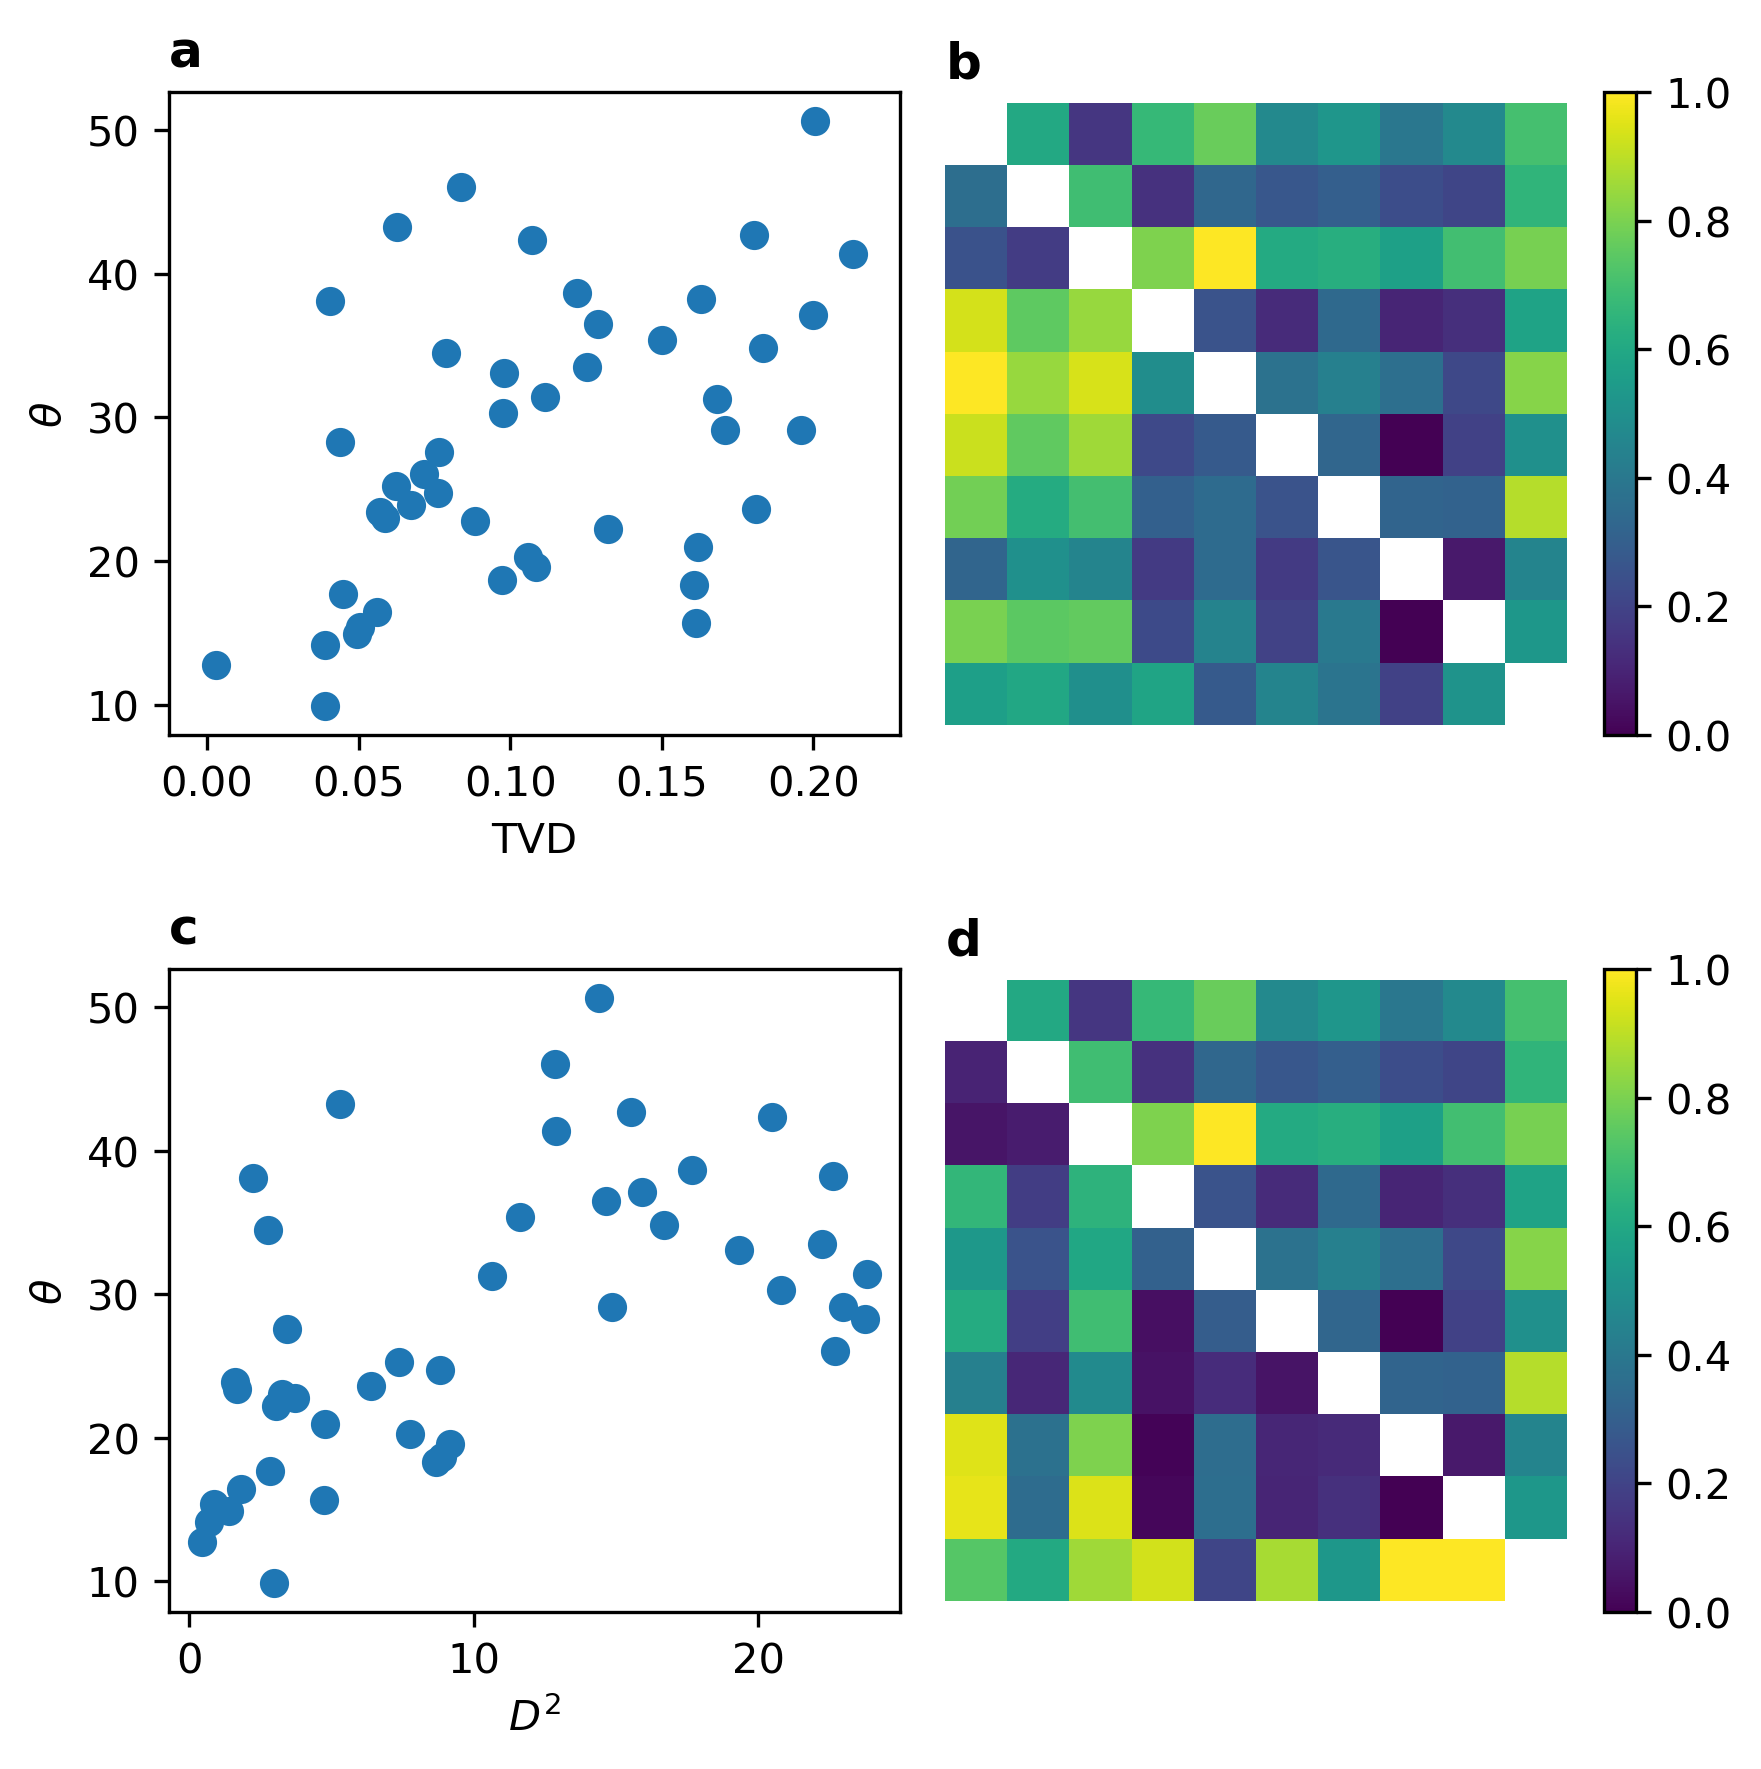

In [6]:
os.chdir(pathfig)

fig = plt.figure(figsize=(6,6), dpi=300)
gs  = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1.scatter(tvds, theta)
ax1.set_ylabel(r'$\theta$')
ax1.set_xlabel('TVD')
ax1.set_title('a', loc = 'left', fontweight='bold')

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(scaled_dists)
ax2.axis('off')
ax2.set_title('b', loc = 'left', fontweight='bold')
fig.colorbar(plt.imshow(scaled_dists), fraction=.1)

ax3 = fig.add_subplot(gs[1,0])
ax3.scatter(madist, theta)
ax3.set_ylabel(r'$\theta$')
ax3.set_xlabel(r'$D^2$')
ax3.set_title('c', loc = 'left', fontweight='bold')

ax4 = fig.add_subplot(gs[1,1])
ax4.imshow(scaled_dists2)
ax4.axis('off')
ax4.set_title('d', loc = 'left', fontweight='bold')
fig.colorbar(plt.imshow(scaled_dists2), fraction=.1)


plt.tight_layout()
plt.savefig("Figure4.png", dpi=300, bbox_inches='tight')
plt.show()